In [ ]:
#mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

In [ ]:
#install PySastrawi to notebook
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library
import numpy as np
import pandas as pd
import re

> load dan edit domain dataset

In [ ]:
#load train dataset
df_train = pd.read_csv('/content/drive/MyDrive/Data_Challange/train_preprocess.tsv', sep='\t', header=None, index_col=False)
#df_train = pd.read_csv('/content/train_preprocess.tsv', sep='\t', header=None)

In [ ]:
#load validation dataset
df_valid = pd.read_csv('/content/drive/MyDrive/Data_Challange/valid_preprocess.tsv', sep='\t', header=None, index_col=False)
#df_valid = pd.read_csv('/content/valid_preprocess.tsv', sep='\t', header=None)
df = df_train.append(df_valid, ignore_index=True)

In [ ]:
#load preprocess dataset
df_test = pd.read_csv('/content/drive/MyDrive/Data_Challange/test_preprocess.tsv', sep='\t', header=None, index_col=False)
#df_test = pd.read_csv('/content/test_preprocess.tsv', sep='\t', header=None)
df = df.append(df_test, ignore_index=True)
df = df.rename(columns={0: 'text',1: 'label'})

In [ ]:
#load kamus alay dataset
kamus_alay = pd.read_csv('/content/drive/MyDrive/Data_Challange/new_kamusalay.csv', encoding='latin-1', header=None)
#kamus_alay = pd.read_csv('/content/new_kamusalay.csv', encoding='latin-1', header=None)
kamus_alay = kamus_alay.rename(columns={0: 'original', 1: 'replacement'})

id_stopword_dict = pd.read_csv('/content/drive/MyDrive/Data_Challange/stopwordbahasa.csv', header=None)
#id_stopword_dict = pd.read_csv('/content/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

>EDA

In [ ]:
#import library

#data manipulation
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#styling visualization
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [ ]:
#output first five rows
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [ ]:
#cek ukuran dataset
df.shape

(12760, 2)

In [ ]:
#cek label value counts 
df.label.value_counts()

positive    7359
negative    4034
neutral     1367
Name: label, dtype: int64

In [ ]:
#cek deskripsi dataset
df.describe()

,text,label
count,12760,12760
unique,12679,3
top,tidak kesal,positive
freq,4,7359


In [ ]:
#cek data yang hilang
df.isnull().sum()

text     0
label    0
dtype: int64

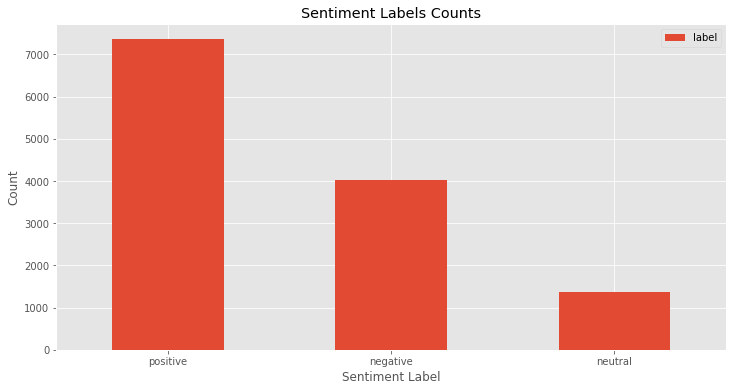

In [ ]:
#plot label in bar plot
df.label.value_counts().plot(kind="bar")
plt.title("Sentiment Labels Counts")
plt.xlabel("Sentiment Label")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
#calculate and add new text lengths column
df['total_word'] = df.text.apply(lambda sent:len(sent.split()))
df.head()

,text,label,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38


Text(3.799999999999997, 0.5, 'Text Length')

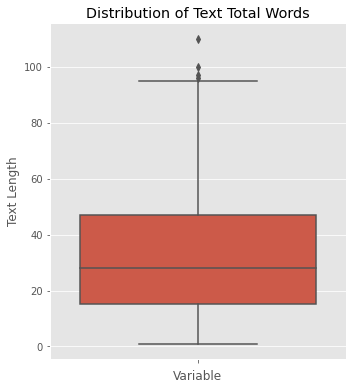

In [ ]:
#plot distribution of tweet text lengths
sns.catplot(y="total_word", data=df, kind="box")
plt.title("Distribution of Text Total Words")
plt.xlabel("Variable")
plt.ylabel("Text Length")

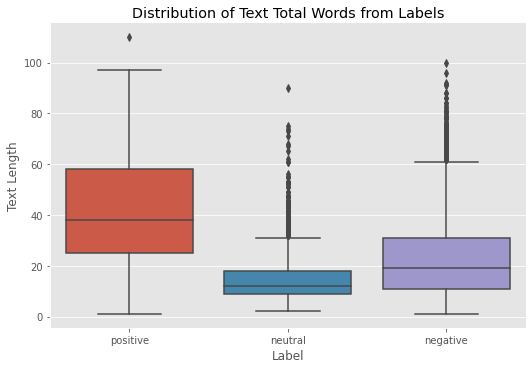

In [ ]:
#plot distribution of text length of every label
sns.catplot(x="label", y="total_word", data=df, kind="box", aspect=1.5)
plt.title("Distribution of Text Total Words from Labels")
plt.ylabel("Text Length")
plt.xlabel("Label")
plt.show()

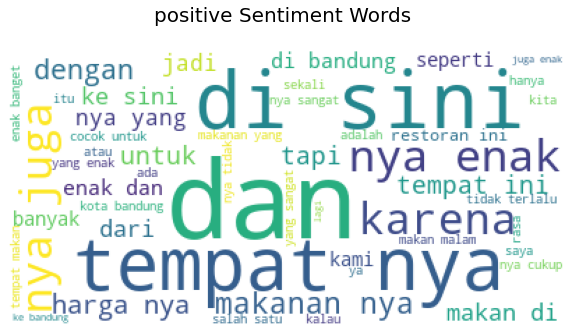

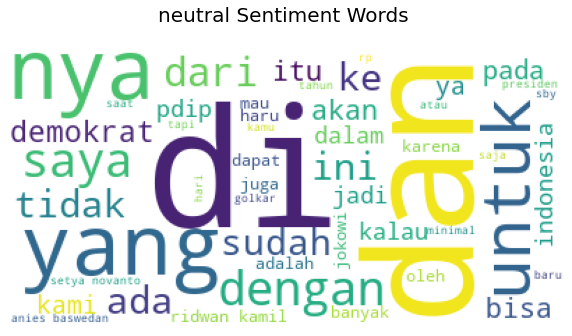

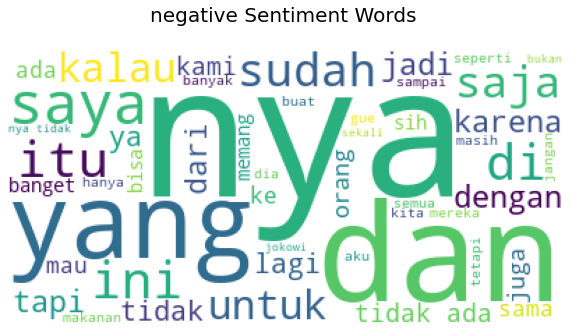

In [ ]:
#visualizing data into wordcloud

from wordcloud import WordCloud, STOPWORDS


def wordcount_gen(df, label):
  #combine all text
  combined_text = " ".join([tweet for tweet in df[df.label==label]['text']])

  #initialize wordcloud subject
  wc = WordCloud(background_color='white',
                 max_words=50,
                 stopwords=STOPWORDS.add("id_stopword_dict"))
  
  #generate and plot wordcloud
  plt.figure(figsize=(10,10))
  plt.imshow(wc.generate(combined_text))
  plt.title('{} Sentiment Words \n'.format(label), fontsize=20)
  plt.axis('off')
  plt.show

#positive text sentiment
wordcount_gen(df, 'positive')

#neutral text sentiment
wordcount_gen(df, 'neutral')

#negative text sentiment
wordcount_gen(df, 'negative')

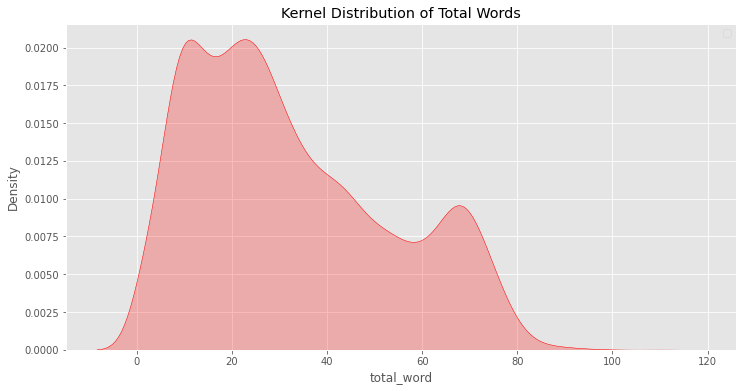

In [ ]:
#distribusi data

plt.figure(figsize=(12,6))
p1 = sns.kdeplot(df['total_word'], shade=True, color='r').set_title('Kernel Distribution of Total Words')
plt.legend()

Kesimpulan: Data tidak terdistribusi normal, *skewness* di kiri

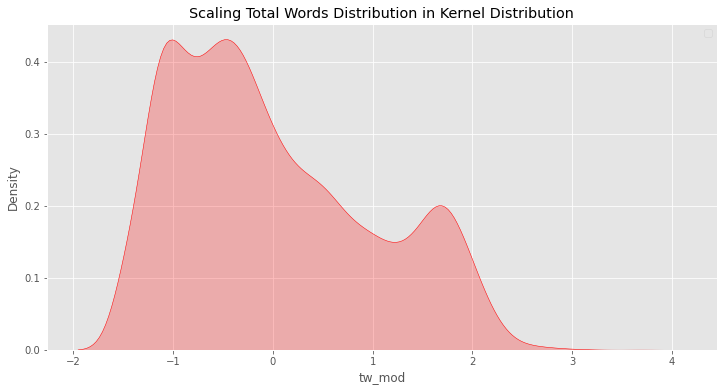

In [ ]:
#feature analysis melalui QQ plot
#scaling the feature using stardardscaler

from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
tw_mod = sd.fit_transform(df["total_word"].values.reshape(-1,1))
tw_mod = tw_mod.reshape(tw_mod.shape[0])
df['tw_mod'] = pd.Series(tw_mod)

#using searborn facetgrid
p1 = sns.kdeplot(df['tw_mod'], shade=True, color='r').set_title('Scaling Total Words Distribution in Kernel Distribution')
plt.legend()

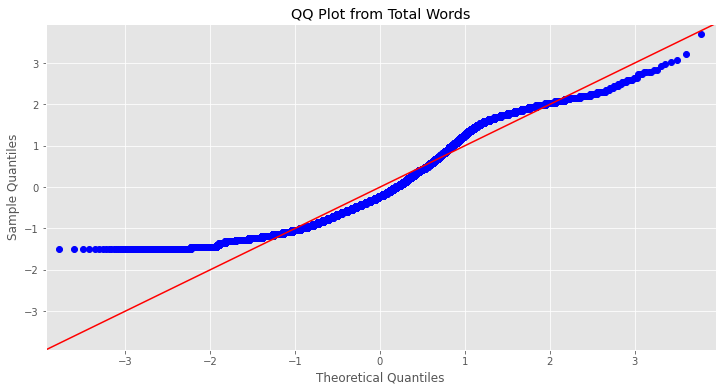

In [ ]:
##qq plot
import statsmodels.api as sm 
sm.qqplot(df["tw_mod"], line ='45') 
plt.title('QQ Plot from Total Words')
plt.show() 

Kesimpulan: 
- Setelah dilakukan feature analysis, dataset yang digunakan tidak terdistribusi normal dengan data berkumpul di sebelah kiri, serta lebih banyak di sebelah kanan.
- Didukung dengan hasil QQ Plot yang tidak mengikuti garis 1:1, menunjukkan data tidak terdistribusi normal.

> prep fungsi cleansing

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#text cleansing with regex
def lowercase(text):
    return text.lower()

def hapus_karakter_ga_penting(text):
    text = re.sub('\n',' ',text) # Hapus enter
    text = re.sub('nya|deh|sih',' ',text) # Hapus stopwords tambahan
    text = re.sub('RT',' ',text) # Hapus RT
    text = re.sub('USER',' ',text) # Hapus USER
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ',text) # Hapus URL
    text = re.sub('  +', ' ', text) # Hapus extra spaces
    text = re.sub('[^a-zA-Z0-9]', ' ', text) #Hapus non huruf dan angka  
    text = re.sub('\@[a-zA-Z0-9]*', ' ', text) #Hapus non huruf atau apostrophe
    text = ' '.join([w for w in text.split() if len(w)>1]) #Hapus huruf tunggal 
    return text
    
def hapus_nonhurufangka(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

kamus_alay_map = dict(zip(kamus_alay['original'], kamus_alay['replacement']))
def normalisasi_alay(text):
    return ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])

def hapus_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Hapus extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

In [ ]:
#cek hasil text cleansing dengan regex
print("hapus_nonhurufangka: ",       hapus_nonhurufangka("apa?!!"))
print("lowercase: ",                 lowercase("EH BIASA AJA DONG"))
print("stemming: ",                  stemming("Perkembangan challange ini sangatlah membanggakan"))
print("emoticon:",                   hapus_karakter_ga_penting(':D , :), :('))
print("hapus_karakter_ga_penting: ", hapus_karakter_ga_penting("ini sih websitenya dpr bagus deh https://www.dpr.go.id.com\n #$(*&(*!&#!, RTUSER #$(*&(*!&#! "))
print("normalisasi_alay: ",          normalisasi_alay("yank aq kgn"))
print("hapus_stopword: ",            hapus_stopword("aku kamu dan kita semua hanyalah stopwords"))

hapus_nonhurufangka:  apa 
lowercase:  eh biasa aja dong
stemming:  kembang challange ini sangat bangga
emoticon: 
hapus_karakter_ga_penting:  ini website dpr bagus
normalisasi_alay:  sayang aku kangen
hapus_stopword:  stopwords


In [ ]:
def cleansing(text):
    text = lowercase(text) 
    text = hapus_nonhurufangka(text) 
    text = hapus_karakter_ga_penting(text) 
    text = normalisasi_alay(text) 
    text = stemming(text) 
    text = hapus_stopword(text) 
    return text

In [ ]:
#apply text cleansing to text column and add new 'text_clean' column
df['text_clean'] = df.text.apply(cleansing)

In [ ]:
df.head()

,text,label,total_word,tw_mod,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66,1.593007,warung milik usaha pabrik puluh kenal putih ba...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17,-0.742461,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,33,0.020141,lokasi strategis jalan sumatra bandung man uta...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17,-0.742461,betapa bahagia unboxing paket barang bagus beli
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38,0.258454,aduh mahasiswa sombong kakak kartu kuning ajar...


____________

In [ ]:
#rapikan tabel sebelum diolah machine learning
df.drop('text', inplace=True, axis=1)
df.drop('total_word', inplace=True, axis=1)
df.drop('tw_mod', inplace=True, axis=1)
new_cols = ['text_clean','label']
df = df.reindex(columns=new_cols)
df = df.reset_index(drop=True)
df

,text_clean,label
0,warung milik usaha pabrik puluh kenal putih ba...,positive
1,mohon ulama lurus k212 mmbri hujjah partai diw...,neutral
2,lokasi strategis jalan sumatra bandung man uta...,positive
3,betapa bahagia unboxing paket barang bagus beli,positive
4,aduh mahasiswa sombong kakak kartu kuning ajar...,negative
...,...,...
12755,tidur minimal enam jam,neutral
12756,indonesia benua asia,neutral
12757,salah gemar anak remaja indonesia dengar korea...,neutral
12758,lihat warna hijau bikin mata santai,positive


In [ ]:
#transform baris dataset menjadi tipe list
negative  = df.loc[df['label'] == 'negative'].text_clean.tolist()
neutral   = df.loc[df['label'] == 'neutral'].text_clean.tolist()
positive  = df.loc[df['label'] == 'positive'].text_clean.tolist()

negative_label  = df.loc[df['label'] == 'negative'].label.tolist()
neutral_label   = df.loc[df['label'] == 'neutral'].label.tolist()
positive_label  = df.loc[df['label'] == 'positive'].label.tolist()

In [ ]:
#total data check
total_data = positive + neutral + negative

In [ ]:
#total label check
label = positive_label + neutral_label + negative_label

In [ ]:
print("Positive: %s, Neutral: %s, Negative: %s" % (len(positive), len(neutral), len(negative)))
print("Total data: %s" % len(total_data))

Positive: 7359, Neutral: 1367, Negative: 4034
Total data: 12760


> cek text yang telah dibersihkan berdasarkan masing-masing label

In [ ]:
df.loc[df['label'] == 'negative'].head()

,text_clean,label
4,aduh mahasiswa sombong kakak kartu kuning ajar...,negative
6,pakai kartu kredit baca untung rugi,negative
10,simcard indosat inaktiv gara gara lupa isi pul...,negative
11,sifat iri muncul orang orang tuju hidup,negative
13,alam indosat moga langgan marah marah layan la...,negative


In [ ]:
df.loc[df['label'] == 'neutral'].tail()

,text_clean,label
12754,kemarin coba kopi warung kopi nako,neutral
12755,tidur minimal enam jam,neutral
12756,indonesia benua asia,neutral
12757,salah gemar anak remaja indonesia dengar korea...,neutral
12759,bondan winarno suka bilang maknyus tiada,neutral


In [ ]:
df.loc[df['label'] == 'positive'].head()

,text_clean,label
0,warung milik usaha pabrik puluh kenal putih ba...,positive
2,lokasi strategis jalan sumatra bandung man uta...,positive
3,betapa bahagia unboxing paket barang bagus beli,positive
5,makan agam harga makan food stall 10 kasir sua...,positive
7,unik bagus foto makan enak pegawai ramah ber l...,positive


__________________________________________

## Neural Network menggunakan Sklearn library

In [ ]:
#import libraries
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

#### Feature extraction menggunakan TF-IDF

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(total_data)

X_tfidf = tfidf_vect.fit_transform(total_data)
print("Feature Extraction Selesai")

Feature Extraction Selesai


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, label, test_size=0.2, random_state=2)

In [ ]:
np.unique(y_train)

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [ ]:
#balancing class weight
from sklearn.utils.class_weight import compute_class_weight
y_train = list(y_train)
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 1.0408891608035078, 1: 3.1389913899138993, 2: 0.581155707372616}

> Latih processed dataset dengan Multinomial Naive Bayes

In [ ]:
NN_with_tfidf = MultinomialNB()
NN_with_tfidf.fit(X_train, y_train)
print("Training selesai")

Training selesai


In [ ]:
model_test = NN_with_tfidf.predict(X_test)
print("Testing selesai")

Testing selesai


In [ ]:
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

    negative       0.69      0.73      0.71       765
     neutral       0.92      0.20      0.33       283
    positive       0.84      0.93      0.88      1504

    accuracy                           0.79      2552
   macro avg       0.81      0.62      0.64      2552
weighted avg       0.80      0.79      0.77      2552



#### Feature extraction menggunakan BOWs

In [ ]:
count_vect = CountVectorizer()
count_vect.fit(total_data)

X_bows = count_vect.fit_transform(total_data)
print("Feature Extraction selesai")

Feature Extraction selesai


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bows, label, test_size=0.2, random_state=2)

In [ ]:
np.unique(y_train)

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [ ]:
#balancing class weight
y_train = list(y_train)
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 1.0408891608035078, 1: 3.1389913899138993, 2: 0.581155707372616}

Latih processed dataset dengan MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(8,128,3), max_iter=50, alpha=0.01,
                     solver='adam', verbose=0,  random_state=2)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

> Latih processed dataset dengan Multinomial Naive Bayes

In [ ]:
NN_with_bows = MultinomialNB()
history = NN_with_bows.fit(X_train, y_train)
print("Training selesai")

In [ ]:
preds = NN_with_bows.predict(X_test)
print("Testing selesai")

In [ ]:
preds = NN_with_bows.predict(X_test)
print("Testing selesai")
print(classification_report(y_test, preds))

Kesimpulan: 
- performa model MultinomialNB dari extraksi fitur BOWs lebih baik dibandingkan ekstraksi fitur tf-idf


____________________

### validasi model terbaik dengan cross validation dan ukur dengan confusion matrix

In [ ]:
y = pd.get_dummies(label)
y_bows = y.values

In [ ]:
kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

accuracies = []

In [ ]:
for iteration, data in enumerate(kf.split(X_bows), start=1):

  data_train    = X_bows[data[0]]
  target_train  = y_bows[data[0]]

  data_test     = X_bows[data[1]]
  target_test   = y_bows[data[1]]

  NN_with_bows = MultinomialNB()
  NN_with_bows.fit(X_train, y_train)
  preds = NN_with_bows.predict(X_test)

  accuracy = accuracy_score(y_test, preds)
  print("Training ke-", iteration)
  print(classification_report(y_test, preds))
  print("====================================")
  
  accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print("Rata-rata Accuracy:", average_accuracy)


Training ke- 1
              precision    recall  f1-score   support

    negative       0.73      0.80      0.76       765
     neutral       0.81      0.67      0.73       283
    positive       0.90      0.89      0.89      1504

    accuracy                           0.84      2552
   macro avg       0.82      0.78      0.80      2552
weighted avg       0.84      0.84      0.84      2552

Training ke- 2
              precision    recall  f1-score   support

    negative       0.73      0.80      0.76       765
     neutral       0.81      0.67      0.73       283
    positive       0.90      0.89      0.89      1504

    accuracy                           0.84      2552
   macro avg       0.82      0.78      0.80      2552
weighted avg       0.84      0.84      0.84      2552

Training ke- 3
              precision    recall  f1-score   support

    negative       0.73      0.80      0.76       765
     neutral       0.81      0.67      0.73       283
    positive       0.90      0

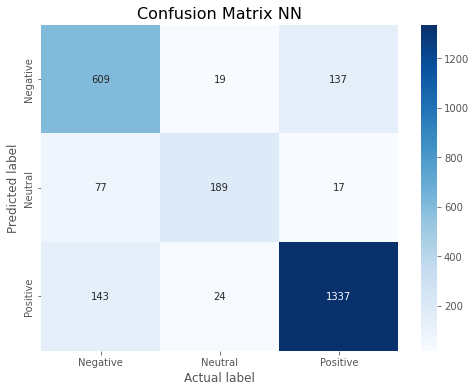

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(NN_with_bows, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    preds = NN_with_bows.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, preds)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion Matrix NN', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(NN_with_bows, X_test, y_test)

In [90]:
contoh_1 = '''saya rasa kamu benar'''

text = count_vect.transform([cleansing(contoh_1)])
hasil = NN_with_bows.predict(text)[0]
print("sentiment:")
print(hasil)

sentiment:
positive


In [91]:
contoh_2 = ''' benua asia negara indonesia pulau jawa'''
text = count_vect.transform([cleansing(contoh_2)])
hasil = NN_with_bows.predict(text)[0]
print("sentiment:")
print(hasil)

sentiment:
neutral


In [92]:
contoh_3 = '''apa sich km alay bgt'''
text = count_vect.transform([cleansing(contoh_3)])
hasil = NN_with_bows.predict(text)[0]
print("sentiment:")
print(hasil)

sentiment:
negative


> simpan model NN dengan performa terbaik dari 3 eksperimen yang dilakukan

In [ ]:
# pickle.dump(X_bows, open("featurebows", "wb"))
# pickle.dump(NN_with_bows, open("modelNN", "wb"))


FINISH


In [89]:
with open('featurebows.pickle', 'wb') as handle:
  pickle.dump(X_bows, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("featurebows.pickle telah dibuat")


with open('ModelNN.pickle', 'wb') as handle:
  pickle.dump(NN_with_bows, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("ModelNN.pickle telah dibuat")


with open('featuretfidf.pickle', 'wb') as handle:
  pickle.dump(X_tfidf, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("featuretfidf.pickle telah dibuat")


with open('ModelNN_tfidf.pickle', 'wb') as handle:
  pickle.dump(NN_with_tfidf, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("ModelNN_tfidf.pickle telah dibuat")



featurebows.pickle telah dibuat
ModelNN.pickle telah dibuat
featuretfidf.pickle telah dibuat
ModelNN_tfidf.pickle telah dibuat


_________________________

## LSTM menggunakan Tensorflow library

___________________________________

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#prep LSTM
max_features = 10000
tokenizerLSTM = Tokenizer(num_words = max_features, split = ' ', lower=True)
tokenizerLSTM.fit_on_texts(total_data)
with open('tokenizerLSTM.pickle','wb') as handle:
  pickle.dump(tokenizerLSTM, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print('tokenizerLSTM.pickle sudah dibuat')

tokenizerLSTM.pickle sudah dibuat


In [ ]:
#ubah dalam pola sequences
XLSTM = tokenizerLSTM.texts_to_sequences(total_data)
vocab_size = len(tokenizerLSTM.word_index)
maxlen = max(len(x) for x in XLSTM)

In [ ]:
#set features (X) dan target (y)
XLSTM = pad_sequences(XLSTM)
with open('x_pad_sequencesLSTM.pickle', 'wb') as handle:
  pickle.dump(XLSTM, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("x_pad_sequencesLSTM.pickle telah dibuat")

x_pad_sequencesLSTM.pickle telah dibuat


In [ ]:
YLSTM = pd.get_dummies(label)
YLSTM = YLSTM.values

with open('y_labelsLSTM.pickle', 'wb') as handle:
  pickle.dump(YLSTM, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print("y_labelsLSTM.pickle telah dibuat")

y_labelsLSTM.pickle telah dibuat


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
file = open("x_pad_sequencesLSTM.pickle",'rb')
XLSTM = pickle.load(file)
file.close()

In [ ]:
file = open("y_labelsLSTM.pickle", 'rb')
YLSTM = pickle.load(file)
file.close()

In [ ]:
#split dataset (70-30)
X_train, X_test, y_train, y_test = train_test_split(XLSTM, YLSTM, test_size = 0.3, random_state=2)

In [ ]:
#import libraries LSTM
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

### Prep konstruksi LSTM
##### Dimensi Embedding = 4
##### Neurons = 128
##### Dropout = 15% (minimize overfitting)
##### Output Layers = 3
> activation function = softmax -> for classifying
##### learning rate = 0.001
##### batch size = 2
##### optimizer = adam
##### loss = binary_crossentropy
##### EarlyStopping = auto

In [ ]:
embed_dim = 4
units = 128

modelLSTM = Sequential()
modelLSTM.add(Embedding(max_features, embed_dim, input_length = XLSTM.shape[1]))
modelLSTM.add(LSTM(units, dropout=0.15))
modelLSTM.add(Dense(3, activation='softmax'))

adam = optimizers.Adam(learning_rate= 0.001)
modelLSTM.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
print(modelLSTM.summary())

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 4)             40000     
                                                                 
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 108,483
Trainable params: 108,483
Non-trainable params: 0
_________________________________________________________________
None


_____________

Epoch 1/20
4466/4466 [==============================] - 37s 7ms/step - loss: 0.3779 - accuracy: 0.7405 - val_loss: 0.3029 - val_accuracy: 0.7941
Epoch 2/20
4466/4466 [==============================] - 31s 7ms/step - loss: 0.2745 - accuracy: 0.8230 - val_loss: 0.2730 - val_accuracy: 0.8281
Minimum validation loss: 0.27297282218933105


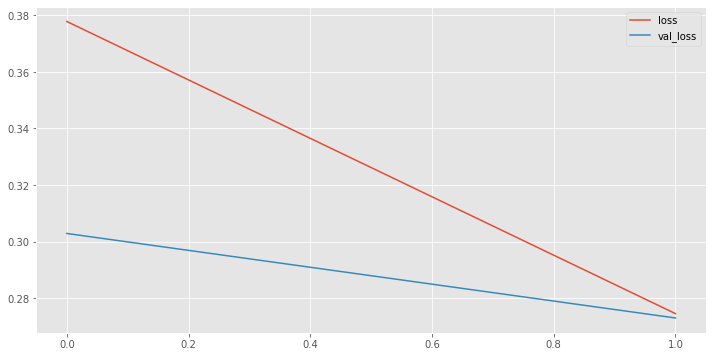

In [ ]:
history = modelLSTM.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=2,
    epochs=20,
    callbacks=[es], 
    verbose=1,  
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
#prediksi model LSTM
from sklearn import metrics

predictions = modelLSTM.predict(X_test)
y_predLSTM = predictions
matrix_testLSTM = metrics.classification_report(y_test.argmax(axis=1), y_predLSTM.argmax(axis=1))
print("Testing selesai")
print(matrix_testLSTM)

120/120 [==============================] - 1s 3ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1171
           1       0.62      0.41      0.49       413
           2       0.90      0.91      0.91      2244

    accuracy                           0.83      3828
   macro avg       0.75      0.71      0.72      3828
weighted avg       0.82      0.83      0.82      3828



In [ ]:
#validasi dengan cross-validation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

accuracies = []

yLSTM = YLSTM

embed_dim = 4
units = 128

In [ ]:
for iteration, data in enumerate(kf.split(XLSTM), start = 1):

  data_train    = XLSTM[data[0]]
  target_train  = yLSTM[data[0]]

  data_test     = XLSTM[data[1]]
  target_test   = yLSTM[data[1]]

  modelLSTM = Sequential()
  modelLSTM.add(Embedding(max_features, embed_dim, input_length = XLSTM.shape[1]))
  modelLSTM.add(LSTM(units, dropout=0.15))
  modelLSTM.add(Dense(3, activation='softmax'))
  adam = optimizers.Adam(learning_rate = 0.001)
  modelLSTM.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

  es = EarlyStopping(monitor = 'val_loss', mode='auto', verbose=1)
  history = modelLSTM.fit(X_train, y_train, epochs = 20, batch_size = 2, validation_data = (X_test, y_test), verbose = 1, callbacks= [es])

  predictions = modelLSTM.predict(X_test)
  y_predLSTM = predictions

  accuracy = accuracy_score(y_test.argmax(axis=1), y_predLSTM.argmax(axis=1))
  print("Training ke-", iteration)
  print(classification_report(y_test.argmax(axis=1), y_predLSTM.argmax(axis=1)))
  print("====================================")


  accuracies.append(accuracy)


average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy", average_accuracy)


Epoch 1/20
4466/4466 [==============================] - 33s 7ms/step - loss: 0.3862 - accuracy: 0.7321 - val_loss: 0.3099 - val_accuracy: 0.7889
Epoch 2/20
4466/4466 [==============================] - 34s 8ms/step - loss: 0.2711 - accuracy: 0.8253 - val_loss: 0.2564 - val_accuracy: 0.8370
Epoch 2: early stopping
120/120 [==============================] - 1s 3ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1171
           1       0.72      0.52      0.60       413
           2       0.90      0.91      0.90      2244

    accuracy                           0.84      3828
   macro avg       0.79      0.74      0.76      3828
weighted avg       0.83      0.84      0.83      3828

Epoch 1/20
4466/4466 [==============================] - 34s 7ms/step - loss: 0.3730 - accuracy: 0.7415 - val_loss: 0.2943 - val_accuracy: 0.7887
Epoch 2/20
4466/4466 [==============================] - 31s 7ms/step - loss: 0.2626 - accu

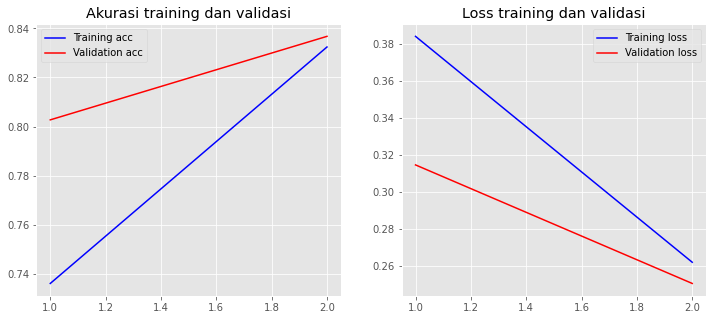

In [ ]:
#visualisasi proses pembelajaran model LSTM
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
  acc       = history.history['accuracy']
  val_acc   = history.history['val_accuracy']
  loss      = history.history['loss']
  val_loss  = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title("Akurasi training dan validasi")
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title("Loss training dan validasi")
  plt.legend()

plot_history(history)



120/120 [==============================] - 0s 3ms/step


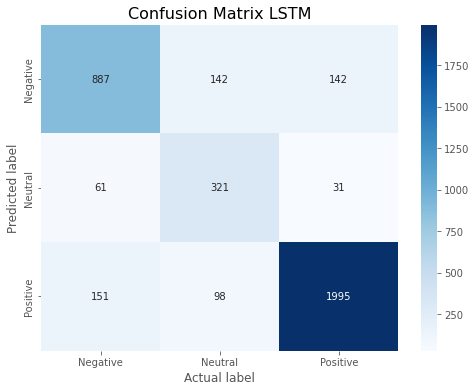

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(modelLSTM, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = modelLSTM.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion Matrix LSTM', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(modelLSTM, X_test, y_test)

In [ ]:
#simpan model LSTM
modelLSTM.save('modelLSTM.h5')
print("Model LSTM telah dibuat")

Model LSTM telah dibuat


In [ ]:
#test model LSTM dengan dummy text
from keras.models import load_model

input_1 = ''' kamu baik sekali, saya senang'''
input_2 = ''' benua asia, negara indonesia, pulau jawa'''
input_3 = ''' apa sich km alay bgt'''

def cleansing(sent):
  string = sent.lower()
  string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
  return string

In [ ]:
sentiment = ['negative','neutral','positive']

text_1 = [cleansing(input_1)]
predicted = tokenizerLSTM.texts_to_sequences(text_1)
guess_1 = pad_sequences(predicted, maxlen=XLSTM.shape[1])

text_2 = [cleansing(input_2)]
predicted = tokenizerLSTM.texts_to_sequences(text_2)
guess_2 = pad_sequences(predicted, maxlen=XLSTM.shape[1])

text_3 = [cleansing(input_3)]
predicted = tokenizerLSTM.texts_to_sequences(text_3)
guess_3 = pad_sequences(predicted, maxlen=XLSTM.shape[1])

modelLSTM = load_model('modelLSTM.h5')
prediction_1 = modelLSTM.predict(guess_1)
polarity_1 = np.argmax(prediction_1[0])

print("Text: ", text_1[0])
print("Sentiment: ", sentiment[polarity_1])

prediction_2 = modelLSTM.predict(guess_2)
polarity_2 = np.argmax(prediction_2[0])

print("Text: ", text_2[0])
print("Sentiment: ", sentiment[polarity_2])

prediction_3 = modelLSTM.predict(guess_3)
polarity_3 = np.argmax(prediction_3[0])

print("Text: ", text_3[0])
print("Sentiment: ", sentiment[polarity_3])

1/1 [==============================] - 0s 352ms/step
Text:   kamu baik sekali  saya senang
Sentiment:  positive
1/1 [==============================] - 0s 15ms/step
Text:   benua asia  negara indonesia  pulau jawa
Sentiment:  neutral
1/1 [==============================] - 0s 15ms/step
Text:   apa sich km alay bgt
Sentiment:  negative
